In [1]:
# Step 1: Import necessary libraries (uncomment for removing warnings)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Suppress oneDNN warning
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # Suppress TF info/warnings (0=all, 1=info off, 2=info/warn off, 3=all off)
import tensorflow as tf
tf.get_logger().setLevel('ERROR')  # Further reduce TF logging
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [2]:
# Step 2: Load and preprocess the MNIST dataset
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

# Apply Zero-Padding to change 28x28 images to 32x32
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

# Reshape to add channel dimension (1 for grayscale) and normalize to [0,1] 
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]


I0000 00:00:1764855914.636567  104669 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1231 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
# Step 3: Define the LeNet-5 model architecture

model = models.Sequential()
model.add(layers.Input(x_train.shape[1:]))
model.add(layers.Conv2D(6, 5, activation='tanh' ))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Step 4: Compile the model
model.compile(
            optimizer='adam',
            loss=losses.sparse_categorical_crossentropy,
            metrics=['accuracy']
            )

history = model.fit(
                    x_train, y_train,
                    batch_size=64,
                    epochs=40,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/40
156/907 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.0975 - loss: 2.3657

I0000 00:00:1764855918.439137  104731 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


907/907 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4292 - loss: 1.5490 - val_accuracy: 0.8845 - val_loss: 0.3934
Epoch 2/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8670 - loss: 0.4176 - val_accuracy: 0.9165 - val_loss: 0.2780
Epoch 3/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9056 - loss: 0.2988 - val_accuracy: 0.9550 - val_loss: 0.1639
Epoch 4/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9186 - loss: 0.2560 - val_accuracy: 0.9530 - val_loss: 0.1656
Epoch 5/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9300 - loss: 0.2202 - val_accuracy: 0.9655 - val_loss: 0.1307
Epoch 6/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9342 - loss: 0.2056 - val_accuracy: 0.9605 - val_loss: 0.1452
Epoch 7/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9407 - loss: 0.1848 - val_accuracy: 0.9675 - val_loss: 0.1198
Epoch 8/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9433 - loss: 0.1754 - val_accuracy: 0.9670 - val_

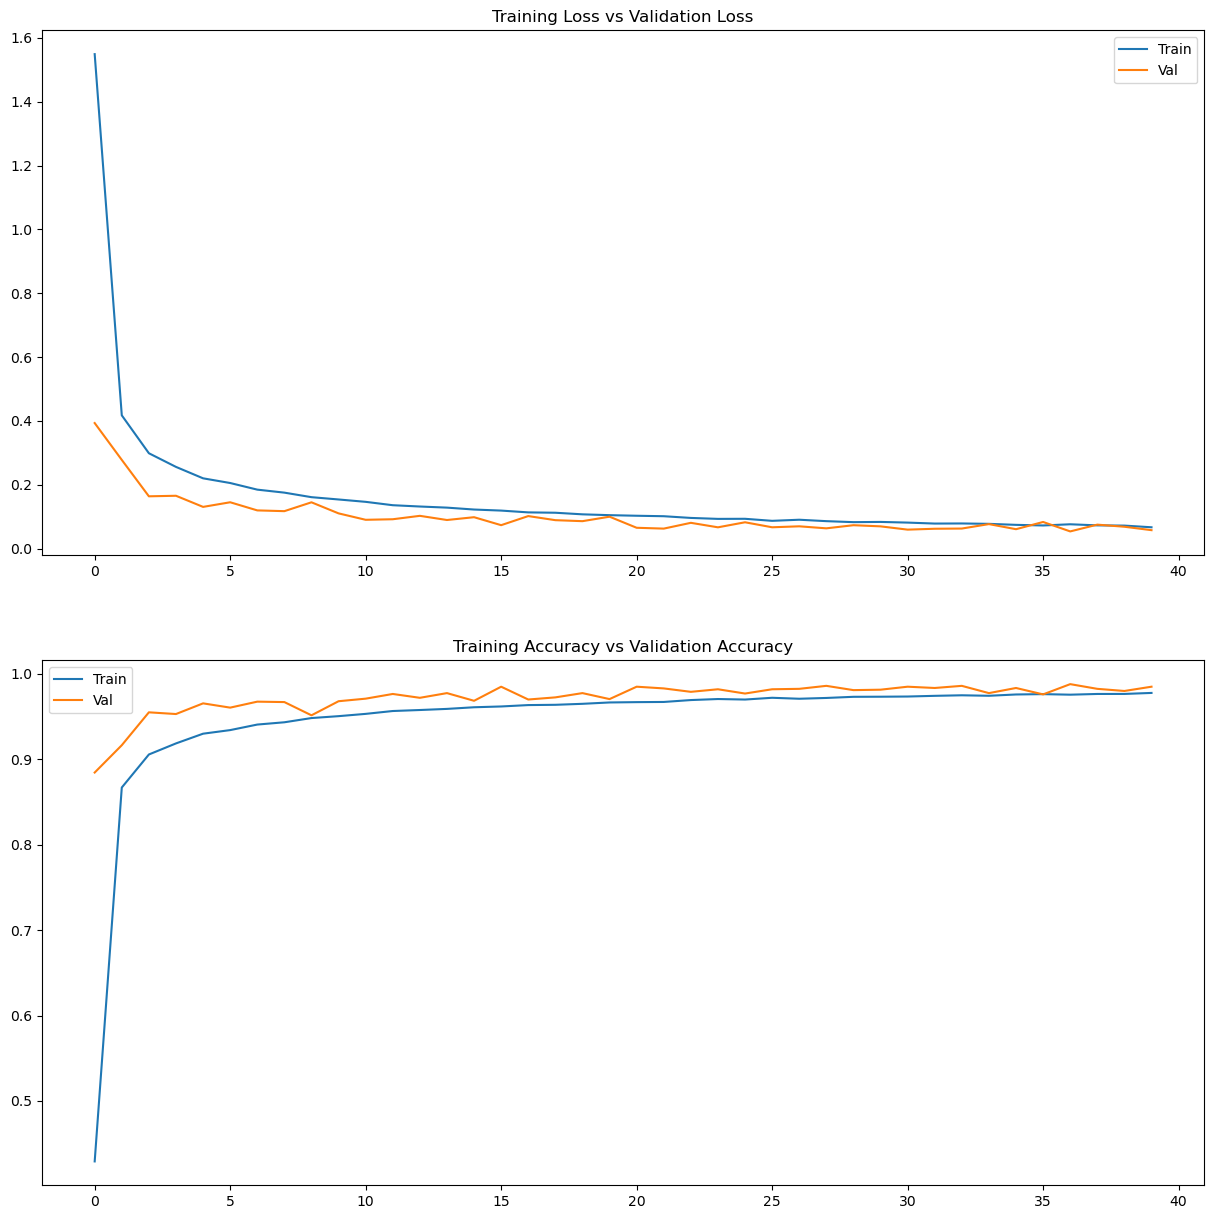

In [5]:
# Step 5: Results
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val']) 
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

In [6]:
# Step 6 : Evaluate on test data
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.9781 - loss: 0.0717


[0.07166362553834915, 0.9781000018119812]